In [58]:
%reload_ext nb_black

import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

import plotly.express as px
from ipywidgets import interact

from sklearn.cluster import (
    KMeans,
    DBSCAN,
    AgglomerativeClustering,
    AffinityPropagation,
    MeanShift,
)

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

try:
    import prince
except ModuleNotFoundError:
    !pip install prince
    import prince

# pd.set_option("display.max_columns", None)
# pd.set_option("display.max_rows", None)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
# filepath = "C:/Users/jlim7/OneDrive/Documents/GitHub/New-York-Bust-Clustering/datafiles/mta_1710.csv"
filepath = "mta_1710.csv"
# nyc = pd.read_csv(filepath, error_bad_lines=False)
# nyc.to_csv("mta_1710.csv", index=False)
nyc = pd.read_csv(filepath)

# help with speed up executing code, comment out later
nyc = nyc.sample(1000000)

<IPython.core.display.Javascript object>

In [3]:
nyc.head(20)

,RecordedAtTime,DirectionRef,PublishedLineName,OriginName,OriginLat,OriginLong,DestinationName,DestinationLat,DestinationLong,VehicleRef,VehicleLocation.Latitude,VehicleLocation.Longitude,NextStopPointName,ArrivalProximityText,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime
4869338,2017-10-23 09:18:11,1,M2,168 ST/AUDUBON AV,40.840644,-73.938543,LTD EAST VILLAGE 8 ST via 5 AV,40.730280,-73.990532,NYCT_3855,40.730290,-73.990592,4 AV/E 9 ST,at stop,0.0,2017-10-23 09:18:17,09:09:00
1745636,2017-10-09 07:42:19,0,Bx6,RIVERSIDE DR W/157-10 RIVERSIDE DR W,40.836311,-73.948435,HUNTS POINT,40.810086,-73.876396,NYCT_708,40.827586,-73.925189,E 161 ST/GERARD AV,at stop,14.0,NaN,07:42:00
865364,2017-10-04 20:04:32,1,Q3,165 ST/TERMINAL,40.707557,-73.795502,JFK AIRPORT via FARMERS BL,40.647137,-73.779426,NYCT_8093,40.709201,-73.797272,HILLSIDE AV/169 ST,< 1 stop away,394.0,2017-10-04 20:06:49,20:05:51
2514738,2017-10-12 10:47:32,1,Bx5,BRUCKNER BL/WESTCHESTER AV,40.851831,-73.827273,SOUTHERN BLVD WESTCHESTER AV,40.824580,-73.891803,NYCT_6107,40.827123,-73.849920,CASTLE HILL AV/BRUCKNER BL,approaching,61.0,2017-10-12 10:48:15,10:38:00
656792,2017-10-04 05:09:00,0,Bx33,W 135 ST/ST NICHOLAS AV,40.816959,-73.947806,PT MORRIS 132 ST,40.799650,-73.911600,NYCT_7685,40.799527,-73.911785,WALNUT AV/E 133 ST,at stop,20.0,2017-10-04 05:09:19,05:06:00
4364319,2017-10-20 14:23:55,0,B1,MACKENZIE LOOP (no G-A-R: use 300000),40.578246,-73.939743,BAY RIDGE 4 AV,40.621842,-74.028363,NYCT_4989,40.578252,-73.939756,ORIENTAL BL/MACKENZIE ST,at stop,0.0,NaN,14:23:00
3539607,2017-10-17 08:05:35,0,X30,VICTORY BL/CLOVE RD,40.616403,-74.103280,57 ST via NEW JERSEY via MADISON,40.770593,-73.991779,NYCT_2753,40.625233,-74.135542,FOREST AV/BARRETT AV,at stop,25.0,NaN,08:02:40
4927048,2017-10-23 13:58:45,1,M101,ST NICHOLAS AV/W 192 ST,40.856288,-73.928768,LTD EAST VILLAGE 6 ST via LEX AV,40.729113,-73.990259,NYCT_6061,40.843131,-73.934536,AMSTERDAM AV/W 172 ST,approaching,140.0,2017-10-23 13:59:30,13:59:10
1874380,2017-10-09 18:02:45,0,B49,ORIENTAL BL/MACKENZIE ST,40.578139,-73.939799,BD-STY FLTN ST via OCEAN AV via ROGRS AV,40.680644,-73.955715,NYCT_7362,40.623186,-73.955911,OCEAN AV/AV K,approaching,54.0,2017-10-09 18:03:23,18:01:40
4579282,2017-10-21 15:05:44,1,S74,ST GEORGE FERRY/S74 & S84,40.643185,-74.073812,BRICKTOWN MALL,40.530061,-74.226654,NYCT_8170,40.589744,-74.101149,RICHMOND RD/BUEL AV,approaching,93.0,2017-10-21 15:06:05,14:54:10


<IPython.core.display.Javascript object>

In [4]:
nyc.shape

(1000000, 17)

<IPython.core.display.Javascript object>

In [5]:
@interact
def do_stuff_interactively(
    text="text input",
    select=["option 1", "option2"],
    num=5,
    num_range=(3, 8),
    bool_tf=True,
):
    """
    * Name the function whatever you want
    * Name the arguments whatever you want
    * @interact chooses an appropriate widget based on default args
    * Do whatever you want in the function code
    * Function will be rerun every time the input changes
    """
    print("^Above widgets auto-generated by `@interact`")
    print("\n----------------------------\n")
    print("Below are the outputs of the function:\n")

    print(f"text: {text}")
    print(f"select: {select}")
    print(f"num: {num}")
    print(f"num_range: {num_range}")
    print(f"bool_tf: {bool_tf}")

interactive(children=(Text(value='text input', description='text'), Dropdown(description='select', options=('o…

<IPython.core.display.Javascript object>

## Data Cleaning

#### Checking for missing values and filling in NANs

In [6]:
# Expected Arrival Time has around 16% missing rows,
# I plan to fill with forward fill.
nyc.isna().mean()

RecordedAtTime               0.000000
DirectionRef                 0.000000
PublishedLineName            0.000000
OriginName                   0.009352
OriginLat                    0.009352
OriginLong                   0.009352
DestinationName              0.000000
DestinationLat               0.001540
DestinationLong              0.001540
VehicleRef                   0.000000
VehicleLocation.Latitude     0.000000
VehicleLocation.Longitude    0.000000
NextStopPointName            0.001065
ArrivalProximityText         0.001065
DistanceFromStop             0.001065
ExpectedArrivalTime          0.160630
ScheduledArrivalTime         0.022148
dtype: float64

<IPython.core.display.Javascript object>

In [7]:
# first I examine the missing data and see if there are any noticeable patterns
nyc.loc[nyc.isnull().any(axis=1)].head()

,RecordedAtTime,DirectionRef,PublishedLineName,OriginName,OriginLat,OriginLong,DestinationName,DestinationLat,DestinationLong,VehicleRef,VehicleLocation.Latitude,VehicleLocation.Longitude,NextStopPointName,ArrivalProximityText,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime
1745636,2017-10-09 07:42:19,0,Bx6,RIVERSIDE DR W/157-10 RIVERSIDE DR W,40.836311,-73.948435,HUNTS POINT,40.810086,-73.876396,NYCT_708,40.827586,-73.925189,E 161 ST/GERARD AV,at stop,14.0,NaN,07:42:00
4364319,2017-10-20 14:23:55,0,B1,MACKENZIE LOOP (no G-A-R: use 300000),40.578246,-73.939743,BAY RIDGE 4 AV,40.621842,-74.028363,NYCT_4989,40.578252,-73.939756,ORIENTAL BL/MACKENZIE ST,at stop,0.0,NaN,14:23:00
3539607,2017-10-17 08:05:35,0,X30,VICTORY BL/CLOVE RD,40.616403,-74.103280,57 ST via NEW JERSEY via MADISON,40.770593,-73.991779,NYCT_2753,40.625233,-74.135542,FOREST AV/BARRETT AV,at stop,25.0,NaN,08:02:40
4193863,2017-10-19 19:12:23,1,Q59,QUEENS BL/62 DR,40.731330,-73.864944,WILLIAMSBURG BRIDGE PLZ via GRAND,40.709341,-73.960413,NYCT_4554,40.709423,-73.960168,Washington Plaza roadway (not a stop),approaching,37.0,NaN,18:39:47
5766438,2017-10-26 19:04:06,1,B38,METROPOLITAN AV/STARR ST,40.713350,-73.914305,DNTWN BKLYN TILLARY ST,40.696117,-73.990995,NYCT_6569,40.690744,-73.956827,DE KALB AV/FRANKLIN AV,at stop,29.0,NaN,19:00:53


<IPython.core.display.Javascript object>

In [8]:
# forward fill missing rows
nyc = nyc.fillna(method="ffill")
nyc.head()

,RecordedAtTime,DirectionRef,PublishedLineName,OriginName,OriginLat,OriginLong,DestinationName,DestinationLat,DestinationLong,VehicleRef,VehicleLocation.Latitude,VehicleLocation.Longitude,NextStopPointName,ArrivalProximityText,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime
4869338,2017-10-23 09:18:11,1,M2,168 ST/AUDUBON AV,40.840644,-73.938543,LTD EAST VILLAGE 8 ST via 5 AV,40.730280,-73.990532,NYCT_3855,40.730290,-73.990592,4 AV/E 9 ST,at stop,0.0,2017-10-23 09:18:17,09:09:00
1745636,2017-10-09 07:42:19,0,Bx6,RIVERSIDE DR W/157-10 RIVERSIDE DR W,40.836311,-73.948435,HUNTS POINT,40.810086,-73.876396,NYCT_708,40.827586,-73.925189,E 161 ST/GERARD AV,at stop,14.0,2017-10-23 09:18:17,07:42:00
865364,2017-10-04 20:04:32,1,Q3,165 ST/TERMINAL,40.707557,-73.795502,JFK AIRPORT via FARMERS BL,40.647137,-73.779426,NYCT_8093,40.709201,-73.797272,HILLSIDE AV/169 ST,< 1 stop away,394.0,2017-10-04 20:06:49,20:05:51
2514738,2017-10-12 10:47:32,1,Bx5,BRUCKNER BL/WESTCHESTER AV,40.851831,-73.827273,SOUTHERN BLVD WESTCHESTER AV,40.824580,-73.891803,NYCT_6107,40.827123,-73.849920,CASTLE HILL AV/BRUCKNER BL,approaching,61.0,2017-10-12 10:48:15,10:38:00
656792,2017-10-04 05:09:00,0,Bx33,W 135 ST/ST NICHOLAS AV,40.816959,-73.947806,PT MORRIS 132 ST,40.799650,-73.911600,NYCT_7685,40.799527,-73.911785,WALNUT AV/E 133 ST,at stop,20.0,2017-10-04 05:09:19,05:06:00


<IPython.core.display.Javascript object>

In [9]:
nyc.isna().mean()

RecordedAtTime               0.0
DirectionRef                 0.0
PublishedLineName            0.0
OriginName                   0.0
OriginLat                    0.0
OriginLong                   0.0
DestinationName              0.0
DestinationLat               0.0
DestinationLong              0.0
VehicleRef                   0.0
VehicleLocation.Latitude     0.0
VehicleLocation.Longitude    0.0
NextStopPointName            0.0
ArrivalProximityText         0.0
DistanceFromStop             0.0
ExpectedArrivalTime          0.0
ScheduledArrivalTime         0.0
dtype: float64

<IPython.core.display.Javascript object>

#### Checking for values with insufficient amount of information

In [10]:
nyc["DirectionRef"].value_counts()

0    500283
1    499717
Name: DirectionRef, dtype: int64

<IPython.core.display.Javascript object>

In [11]:
nyc["PublishedLineName"].value_counts()

B6         18452
B41        14999
Q58        14337
B35        12847
Q44-SBS    12757
           ...  
QM1            3
QM35           3
QM11           3
QM42           3
QM31           1
Name: PublishedLineName, Length: 326, dtype: int64

<IPython.core.display.Javascript object>

In [12]:
# get rid of values in published line name with less than 100 values.
count = nyc["PublishedLineName"].value_counts()
keep = count[count > 100].index
nyc = nyc[nyc["PublishedLineName"].isin(keep)]

<IPython.core.display.Javascript object>

In [13]:
nyc["OriginName"].value_counts()

E 126 ST/2 AV                14170
MERRICK BL/ARCHER AV         13923
W 179 ST/BROADWAY            12542
HARWAY AV/BAY 37 ST          10027
138 ST/37 AV                  9978
                             ...  
UNDERCLIFF AV/W 176 ST           3
FRANCIS LEWIS BL/28 AV           3
E 68 ST/LEXINGTON AV             2
E 16 ST/SHEEPSHEAD BAY RD        1
E TREMONT AV/ERICSON PL          1
Name: OriginName, Length: 616, dtype: int64

<IPython.core.display.Javascript object>

In [14]:
# get rid of values in origin name with less than 100 values.
count = nyc["OriginName"].value_counts()
keep = count[count > 99].index
nyc = nyc[nyc["OriginName"].isin(keep)]

<IPython.core.display.Javascript object>

In [15]:
nyc["DestinationName"].value_counts()

WASHINGTON HTS GW BRIDGE    13584
ST GEORGE FERRY              8778
FLUSHING  MAIN ST STA        7937
W FARMS RD SOUTHERN BL       7540
FLUSHING MAIN ST STA         6371
                            ...  
FULTON ST                       1
MARSH AV RING RD                1
NARROWS AV                      1
165 ST                          1
FORDHAM RD                      1
Name: DestinationName, Length: 611, dtype: int64

<IPython.core.display.Javascript object>

In [16]:
# get rid of values in destination name with less than 100 values.
count = nyc["DestinationName"].value_counts()
keep = count[count > 99].index
nyc = nyc[nyc["DestinationName"].isin(keep)]

<IPython.core.display.Javascript object>

In [17]:
nyc["VehicleRef"].value_counts()

NYCT_5845    501
NYCT_6039    490
NYCT_5843    471
NYCT_5850    450
NYCT_5846    448
            ... 
NYCT_5884      2
NYCT_9503      2
NYCT_5565      2
NYCT_2217      1
NYCT_1271      1
Name: VehicleRef, Length: 4451, dtype: int64

<IPython.core.display.Javascript object>

In [18]:
# get rid of values in vehicle ref with less than 100 values.
count = nyc["VehicleRef"].value_counts()
keep = count[count > 99].index
nyc = nyc[nyc["VehicleRef"].isin(keep)]

<IPython.core.display.Javascript object>

In [19]:
nyc["NextStopPointName"].value_counts()

W 181 ST/AMSTERDAM AV         1837
BAY ST/NICK LAPORTE PL        1690
MERRICK BL/ARCHER AV          1673
KINGS PLAZA                   1480
HOYT AV/31 ST                 1453
                              ... 
Arthur Kill Rd/Annadale Rd       1
E 169 ST/SIMPSON ST              1
HUGUENOT AV/ROSEDALE AV          1
PROSPECT AV/LAFAYETTE AV         1
MARTLING AV/MANOR RD             1
Name: NextStopPointName, Length: 9213, dtype: int64

<IPython.core.display.Javascript object>

In [20]:
# get rid of values in next stop point name with less than 20 values.
count = nyc["NextStopPointName"].value_counts()
keep = count[count > 19].index
nyc = nyc[nyc["NextStopPointName"].isin(keep)]

<IPython.core.display.Javascript object>

In [21]:
nyc["ArrivalProximityText"].value_counts()

approaching        352583
< 1 stop away      291578
at stop            271054
0.6 miles away       5123
0.5 miles away       3606
                    ...  
19.1 miles away         1
16.4 miles away         1
9.2 miles away          1
14.7 miles away         1
8.8 miles away          1
Name: ArrivalProximityText, Length: 199, dtype: int64

<IPython.core.display.Javascript object>

In [22]:
# get rid of values in arrival proximity text with less than 20 values.
count = nyc["ArrivalProximityText"].value_counts()
keep = count[count > 19].index
nyc = nyc[nyc["ArrivalProximityText"].isin(keep)]

<IPython.core.display.Javascript object>

#### Change data types 

In [23]:
nyc.dtypes

RecordedAtTime                object
DirectionRef                   int64
PublishedLineName             object
OriginName                    object
OriginLat                    float64
OriginLong                   float64
DestinationName               object
DestinationLat               float64
DestinationLong              float64
VehicleRef                    object
VehicleLocation.Latitude     float64
VehicleLocation.Longitude    float64
NextStopPointName             object
ArrivalProximityText          object
DistanceFromStop             float64
ExpectedArrivalTime           object
ScheduledArrivalTime          object
dtype: object

<IPython.core.display.Javascript object>

In [24]:
nyc["RecordedAtTime"] = pd.to_datetime(nyc["RecordedAtTime"])

<IPython.core.display.Javascript object>

In [25]:
# creating new columns for hours/minutes/seconds
nyc["RecordedAtTimeHour"] = nyc["RecordedAtTime"].dt.hour
nyc["RecordedAtTimeMinute"] = nyc["RecordedAtTime"].dt.minute
nyc["RecordedAtTimeSecond"] = nyc["RecordedAtTime"].dt.second

<IPython.core.display.Javascript object>

In [26]:
# creating new columns for day of the week and month
# for day of week: monday = 0, sunday = 6
# for month: January = 1, December = 12
nyc["RecordedAtTimeDayofWeek"] = nyc["RecordedAtTime"].dt.dayofweek
nyc["RecordedAtTimeMonth"] = nyc["RecordedAtTime"].dt.month

<IPython.core.display.Javascript object>

In [75]:
nyc["RecordedAtTimeDayofWeek"].value_counts()

1    169027
0    164320
2    136312
4    135684
3    135548
6    100686
5     97153
Name: RecordedAtTimeDayofWeek, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [76]:
# data is all for one month, can drop this column
nyc["RecordedAtTimeMonth"].value_counts()

10    938730
Name: RecordedAtTimeMonth, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [77]:
nyc = nyc.drop(columns=["RecordedAtTimeMonth"])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [27]:
nyc["ExpectedArrivalTime"] = pd.to_datetime(nyc["ExpectedArrivalTime"])

<IPython.core.display.Javascript object>

In [28]:
# creating new columns for hours/minutes/seconds
nyc["ExpectedArrivalTimeHour"] = nyc["ExpectedArrivalTime"].dt.hour
nyc["ExpectedArrivalTimeMinute"] = nyc["ExpectedArrivalTime"].dt.minute
nyc["ExpectedArrivalTimeSecond"] = nyc["ExpectedArrivalTime"].dt.second

<IPython.core.display.Javascript object>

In [29]:
# creating new columns for day of the week and month
# for day of week: monday = 0, sunday = 6
# for month: January = 1, December = 12
nyc["ExpectedArrivalTimeDayofWeek"] = nyc["ExpectedArrivalTime"].dt.dayofweek
nyc["ExpectedArrivalTimeMonth"] = nyc["ExpectedArrivalTime"].dt.month

<IPython.core.display.Javascript object>

In [73]:
# Data mostly consists of one month, therefore I will drop this column.
nyc["ExpectedArrivalTimeMonth"].value_counts()

10    938718
11        12
Name: ExpectedArrivalTimeMonth, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [78]:
nyc = nyc.drop(columns=["ExpectedArrivalTimeMonth"])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [74]:
nyc["ExpectedArrivalTimeDayofWeek"].value_counts()

0    170094
1    161744
2    134548
4    133876
3    128541
6    107095
5    102832
Name: ExpectedArrivalTimeDayofWeek, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [30]:
# cleaning up time in scheduled time to be under 24 hours
schedule_df = nyc["ScheduledArrivalTime"].str.split(":", expand=True)
schedule_df = schedule_df.apply(pd.to_numeric, axis=1)
schedule_df.loc[schedule_df[0] >= 24] -= 24

<IPython.core.display.Javascript object>

In [31]:
schedule_df = schedule_df.rename(
    columns={
        0: "ScheduledArrivalTimeHour",
        1: "ScheduledArrivalTimeMinute",
        2: "ScheduledArrivalTimeSecond",
    }
)
schedule_df.head()

,ScheduledArrivalTimeHour,ScheduledArrivalTimeMinute,ScheduledArrivalTimeSecond
4869338,9,9,0
1745636,7,42,0
865364,20,5,51
2514738,10,38,0
656792,5,6,0


<IPython.core.display.Javascript object>

In [32]:
# combine the two dataframes so all the times and data is in one table
nyc = pd.concat([nyc, schedule_df], axis=1, ignore_index=False)

<IPython.core.display.Javascript object>

In [33]:
# extracted data from time columns, can drop columns now
nyc = nyc.drop(
    columns=["RecordedAtTime", "ExpectedArrivalTime", "ScheduledArrivalTime"]
)

<IPython.core.display.Javascript object>

Used this website to specify how I defined Arrival Proximity Text:
https://bustime.mta.info/wiki/Help/TipsAndTricks#:~:text=Obviously%2C%20if%20you%20are%20further,time%20to%20reach%20the%20stop.&text=The%20bus%20was%20last%20measured%20within%20100%20feet%20of%20your,stop%20to%20board%20your%20bus.

Average distance between bus stops according to https://nyc.streetsblog.org/2019/04/19/never-stop-stopping-removing-bus-stops-isnt-easy-in-new-york-city-or-anywhere-else/#:~:text=The%20MTA's%20standard%20distance%20is,report%20by%20Comptroller%20Scott%20Stringer is around 750 ft

In [35]:
# changing arrival proximity text values to numerical values
# at stop = 0
# approaching ~ 500 feet which equates to around .09 miles
# 1 stop ~ 750 feet which equates to around 0.14 miles
# unsure what to define < 1 stop away as in miles (for practicallity, just defining <1 stop away and 1 stop away as the same)

nyc["ArrivalProximityText"] = nyc["ArrivalProximityText"].str.replace("at stop", "0")
nyc["ArrivalProximityText"] = nyc["ArrivalProximityText"].str.replace(
    "approaching", "0.9"
)
nyc["ArrivalProximityText"] = nyc["ArrivalProximityText"].str.replace("miles away", "")
nyc["ArrivalProximityText"] = nyc["ArrivalProximityText"].str.replace(
    "1 stop away", "0.14"
)
nyc["ArrivalProximityText"] = nyc["ArrivalProximityText"].str.replace("< ", "")

<IPython.core.display.Javascript object>

In [36]:
nyc["ArrivalProximityText"].value_counts()

0.9     352583
0.14    291612
0       271054
0.6       5123
0.5       3606
         ...  
6.3         42
6.2         37
6.6         34
7.0         29
6.1         28
Name: ArrivalProximityText, Length: 69, dtype: int64

<IPython.core.display.Javascript object>

In [37]:
nyc["ArrivalProximityText"] = pd.to_numeric(nyc["ArrivalProximityText"])

<IPython.core.display.Javascript object>

In [38]:
nyc.dtypes

DirectionRef                      int64
PublishedLineName                object
OriginName                       object
OriginLat                       float64
OriginLong                      float64
DestinationName                  object
DestinationLat                  float64
DestinationLong                 float64
VehicleRef                       object
VehicleLocation.Latitude        float64
VehicleLocation.Longitude       float64
NextStopPointName                object
ArrivalProximityText            float64
DistanceFromStop                float64
RecordedAtTimeHour                int64
RecordedAtTimeMinute              int64
RecordedAtTimeSecond              int64
RecordedAtTimeDayofWeek           int64
RecordedAtTimeMonth               int64
ExpectedArrivalTimeHour           int64
ExpectedArrivalTimeMinute         int64
ExpectedArrivalTimeSecond         int64
ExpectedArrivalTimeDayofWeek      int64
ExpectedArrivalTimeMonth          int64
ScheduledArrivalTimeHour          int64


<IPython.core.display.Javascript object>

#### Dropping features that will not be used in clustering

In [79]:
# Create copy of data frame and rename to be used for clustering
nyc_clust = nyc.copy()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [80]:
# Since we have Latitude and Longitude for both Origin and Destination, drop origin/destination name
nyc_clust = nyc_clust.drop(columns=["OriginName", "DestinationName"])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [81]:
# published line name (drop for clustering/one hot encode)
# vehicle ref (drop for clustering/one hot encode)
# next stop point name (drop for clustering/one hot encode)
# arrival proximity text (change to numeric but unsure how)
nyc_clust.dtypes

DirectionRef                      int64
PublishedLineName                object
OriginLat                       float64
OriginLong                      float64
DestinationLat                  float64
DestinationLong                 float64
VehicleRef                       object
VehicleLocation.Latitude        float64
VehicleLocation.Longitude       float64
NextStopPointName                object
ArrivalProximityText            float64
DistanceFromStop                float64
RecordedAtTimeHour                int64
RecordedAtTimeMinute              int64
RecordedAtTimeSecond              int64
RecordedAtTimeDayofWeek           int64
ExpectedArrivalTimeHour           int64
ExpectedArrivalTimeMinute         int64
ExpectedArrivalTimeSecond         int64
ExpectedArrivalTimeDayofWeek      int64
ScheduledArrivalTimeHour          int64
ScheduledArrivalTimeMinute        int64
ScheduledArrivalTimeSecond        int64
ClusterLabel                      int32
dtype: object

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [82]:
nyc_clust.head()

,DirectionRef,PublishedLineName,OriginLat,OriginLong,DestinationLat,DestinationLong,VehicleRef,VehicleLocation.Latitude,VehicleLocation.Longitude,NextStopPointName,...,RecordedAtTimeSecond,RecordedAtTimeDayofWeek,ExpectedArrivalTimeHour,ExpectedArrivalTimeMinute,ExpectedArrivalTimeSecond,ExpectedArrivalTimeDayofWeek,ScheduledArrivalTimeHour,ScheduledArrivalTimeMinute,ScheduledArrivalTimeSecond,ClusterLabel
4869338,1,M2,40.840644,-73.938543,40.730280,-73.990532,NYCT_3855,40.730290,-73.990592,4 AV/E 9 ST,...,11,0,9,18,17,0,9,9,0,0
1745636,0,Bx6,40.836311,-73.948435,40.810086,-73.876396,NYCT_708,40.827586,-73.925189,E 161 ST/GERARD AV,...,19,0,9,18,17,0,7,42,0,4
865364,1,Q3,40.707557,-73.795502,40.647137,-73.779426,NYCT_8093,40.709201,-73.797272,HILLSIDE AV/169 ST,...,32,2,20,6,49,2,20,5,51,3
2514738,1,Bx5,40.851831,-73.827273,40.824580,-73.891803,NYCT_6107,40.827123,-73.849920,CASTLE HILL AV/BRUCKNER BL,...,32,3,10,48,15,3,10,38,0,4
656792,0,Bx33,40.816959,-73.947806,40.799650,-73.911600,NYCT_7685,40.799527,-73.911785,WALNUT AV/E 133 ST,...,0,2,5,9,19,2,5,6,0,4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Clustering

In [83]:
nyc_clust = nyc_clust.drop(
    columns=["PublishedLineName", "VehicleRef", "NextStopPointName"]
)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### KMeans with PCA

In [84]:
scaler = StandardScaler()
X_std = scaler.fit_transform(nyc_clust)

# Computing the first principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.36193072333744136


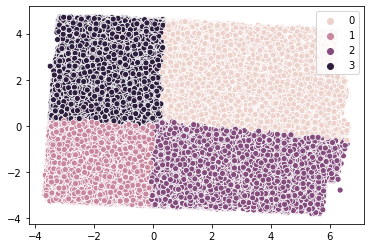

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [60]:
km = KMeans(n_clusters=4)
km.fit(X_pca)
sns.scatterplot(X_pca[:, 0], X_pca[:, 1], hue=km.labels_)

labels = km.fit_predict(X_pca)
print(metrics.silhouette_score(X_pca, labels, metric="euclidean"))

0.3860747529572013


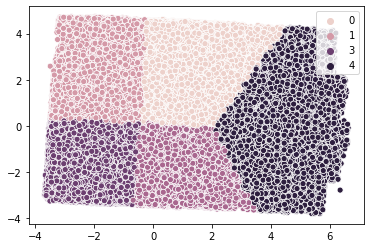

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [61]:
km = KMeans(n_clusters=5)
km.fit(X_pca)
sns.scatterplot(X_pca[:, 0], X_pca[:, 1], hue=km.labels_)

labels = km.fit_predict(X_pca)
print(metrics.silhouette_score(X_pca, labels, metric="euclidean"))

0.37304792234713813


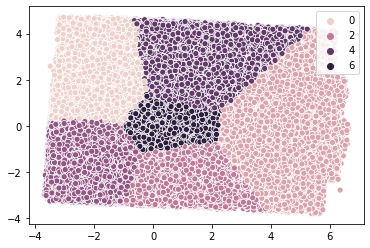

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [62]:
km = KMeans(n_clusters=6)
km.fit(X_pca)
sns.scatterplot(X_pca[:, 0], X_pca[:, 1], hue=km.labels_)

labels = km.fit_predict(X_pca)
print(metrics.silhouette_score(X_pca, labels, metric="euclidean"))

0.36954999205142197


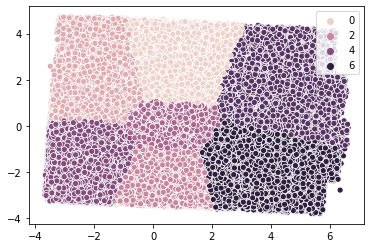

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [63]:
km = KMeans(n_clusters=7)
km.fit(X_pca)
sns.scatterplot(X_pca[:, 0], X_pca[:, 1], hue=km.labels_)

labels = km.fit_predict(X_pca)
print(metrics.silhouette_score(X_pca, labels, metric="euclidean"))

0.34278753189713235


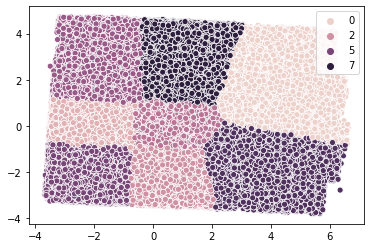

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [64]:
km = KMeans(n_clusters=8)
km.fit(X_pca)
sns.scatterplot(X_pca[:, 0], X_pca[:, 1], hue=km.labels_)

labels = km.fit_predict(X_pca)
print(metrics.silhouette_score(X_pca, labels, metric="euclidean"))

0.3607708819689523


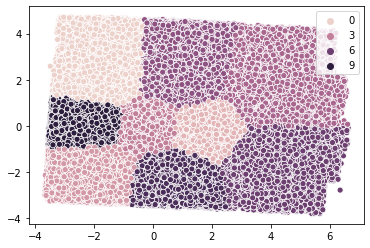

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [65]:
km = KMeans(n_clusters=9)
km.fit(X_pca)
sns.scatterplot(X_pca[:, 0], X_pca[:, 1], hue=km.labels_)

labels = km.fit_predict(X_pca)
print(metrics.silhouette_score(X_pca, labels, metric="euclidean"))

0.36049452051877606


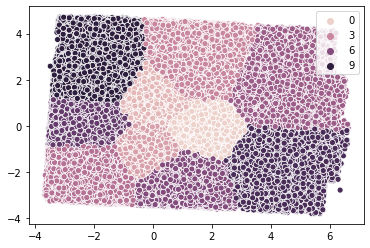

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [66]:
km = KMeans(n_clusters=10)
km.fit(X_pca)
sns.scatterplot(X_pca[:, 0], X_pca[:, 1], hue=km.labels_)

labels = km.fit_predict(X_pca)
print(metrics.silhouette_score(X_pca, labels, metric="euclidean"))

KMeans with PCA Silhouette Score Results:
* 4 clusters: 0.362
* 5 clusters: 0.386
* 6 clusters: 0.373
* 7 clusters: 0.370
* 8 clusters: 0.343
* 9 clusters: 0.361
* 10 clusters: 0.360

KMeans with PCA of 5 clusters has the best results, therefore I will be using K = 5 for my analysis.

In [85]:
km = KMeans(n_clusters=5)
km.fit(X_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [86]:
# adding the cluster labels to the original dataframe
nyc["ClusterLabel"] = km.labels_

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [87]:
# creating a table of cluster means to look for any patterns
clst_means = nyc.groupby("ClusterLabel").mean()
clst_means.style.background_gradient()

,DirectionRef,OriginLat,OriginLong,DestinationLat,DestinationLong,VehicleLocation.Latitude,VehicleLocation.Longitude,ArrivalProximityText,DistanceFromStop,RecordedAtTimeHour,RecordedAtTimeMinute,RecordedAtTimeSecond,RecordedAtTimeDayofWeek,ExpectedArrivalTimeHour,ExpectedArrivalTimeMinute,ExpectedArrivalTimeSecond,ExpectedArrivalTimeDayofWeek,ScheduledArrivalTimeHour,ScheduledArrivalTimeMinute,ScheduledArrivalTimeSecond
ClusterLabel,,,,,,,,,,,,,,,,,,,,
0,0.507223,40.705639,-73.951940,40.701917,-73.953161,40.702372,-73.953510,0.424988,162.856699,17.327992,29.653433,29.334096,2.812980,17.121751,29.669914,29.469045,2.830731,17.226278,29.242208,21.946064
1,0.480405,40.798291,-73.866683,40.798864,-73.862308,40.800674,-73.862228,0.385859,157.153211,17.306267,29.831170,29.309046,2.758415,17.072543,29.811128,29.393147,2.781279,17.222108,29.294241,21.144554
2,0.497011,40.688428,-73.962426,40.690982,-73.961593,40.687881,-73.962971,0.440132,190.821971,7.911857,30.396619,29.363631,2.474075,8.407002,30.335120,29.829292,2.505928,7.923854,28.280359,19.877520
3,0.503866,40.796955,-73.861796,40.797477,-73.863399,40.799198,-73.859851,0.384551,160.609617,8.437508,30.483046,29.287801,2.482695,8.903039,30.433723,29.678961,2.523406,8.424938,28.703960,19.365033
4,0.523099,40.620592,-74.060966,40.613915,-74.067435,40.609387,-74.066958,0.473019,293.285685,14.273677,29.674072,29.415769,2.644887,14.305537,29.718037,29.602669,2.692996,14.223453,28.984032,23.208359


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [88]:
nyc["ClusterLabel"].value_counts()

0    237911
1    212302
2    210623
3    185208
4     92686
Name: ClusterLabel, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Analyzying KMeans with PCA

In [ ]:
# want 

### DBSCAN with T-SNE